# <h2 style="font-family: Times New Roman; text-align: center"><b>Prediction of Heart Disease</b><br></h2>

<center>
    <img src="https://prakashhospitals.in/wp-content/uploads/2022/04/HFDF56QNUNDHPJT6A5JH5RQYAE.webp" alt="Human Heart" width="35%">
</center>


<H3 style="font-family: Times New Roman">AIM:</H3>
<p>
- Early Detection of Heart Disease using ML Model.<br>
- Providing healthcare professionals with valuable insights, aiding in effective decision-making.<br>
- Developing a model that is not only accurate but also accessible and efficient in a healthcare setting.<br>
- Prepare for advancements in the field by keeping the model adaptable and capable of benefiting from future improvements.<br><br>
<p>

<h3 style="font-family: Times New Roman" >DATASET ATTRIBUTES:</h3>    

<b>- Age</b>: Age of the patient[in years]
<br>- <b>Sex</b>: Gender of the patient[M:Male, F:Female]
<br>- <b>Chess Pain Type</b>: Chest pain type [TA:Typical Angina, ATA:Atypical Angina, NAP:Non-Anginal Pain, ASY:Asymptomatic]
<br>- <b>Resting BP</b>: Resting Blood Pressure [mm Hg]
<br>- <b>Cholestrol</b>: Serum Cholesterol level [mm/dl]
<br>- <b>Fasting BS</b>: Fasting Blood Sugar level [1: if FastingBS > 120 mg/dl, 0: otherwise]
<br>- <b>Resting ECG</b>: Resting ElectroCardiogram Results [Normal:Normal, ST:having ST-T wave abnormality, LVH:showing probable or definite left ventricular hypertrophy by Estes' criteria]
<br>- <b>Max HR</b>: Maximum HeartRate achieved [Numeric value between 60 and 202]
<br>- <b>Exercise Angina</b>: Exercise-induced angina [Y:Yes, N:No]
<br>- <b>OldPeak</b>: Oldpeak= ST[Numeric value measured in depression]
<br>- <b>ST_Slope</b>: Slope of the peak exercise ST segment [Up:upsloping, Flat:flat, Down:downsloping]
<br>- <b>HeartDisease</b>: Output Class [1:heart disease, 0:Normal]

<br>


Dataset Link:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Filter warnings
import warnings
warnings.filterwarnings("ignore")

### <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Dataset Information</div>

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<i>No Null values present</i> 

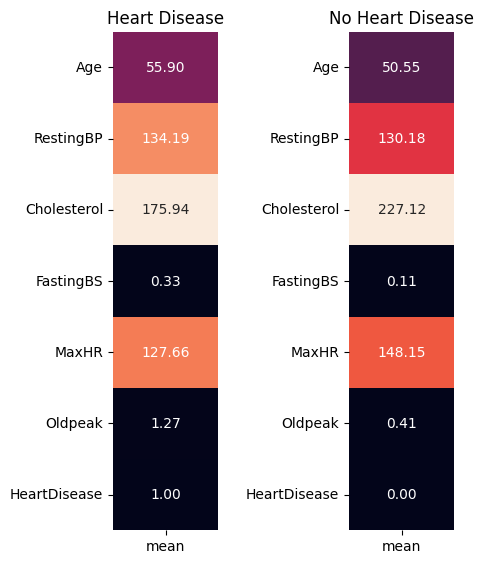

In [29]:
# SNS Heatmap providing the mean values of all the features for cases of heart diseases and non-heart diseases

yes=df[df['HeartDisease']==1].describe().T
no=df[df['HeartDisease']==0].describe().T
colors=['#F93822','#FDD20E']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,6))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot=True,cbar=False,fmt='0.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
# sns.heatmap(yes[['mean']],annot=True,cbar=False)
sns.heatmap(no[['mean']],annot=True,cbar=False,fmt='0.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad=2)

### <div style="font-family: Times New Roman; padding: 9px; line-height: 1;">Performing EDA</div>

Categorical Features are defined if the the attribute has less than 6 unique elements else it is Numerical Feature

In [8]:
# Dividing features into Numerical and Categorical:

col=list(df.columns)
cf=[]  #Categorical Features
nf=[]  #Numerical Features
for i in col:
    if len(df[i].unique())>6:
        nf.append(i)
    else:
        cf.append(i)


In [13]:
print("Number of Categorical Features:", len(cf))
print("Number of Numerical Features:", len(nf))
print()

print('Categorical Features: ',*cf)
print('Numerical Features: ',*nf)

Number of Categorical Features: 7
Number of Numerical Features: 5

Categorical Features:  Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features:  Age RestingBP Cholesterol MaxHR Oldpeak


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df.copy(deep=True)

df1['Sex']=le.fit_transform(df1['Sex'])
df1['ChestPainType']=le.fit_transform(df1['ChestPainType'])
df1['RestingECG']=le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina']=le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope']=le.fit_transform(df1['ST_Slope'])

Text(0.5, 1.0, 'Distribution: HeartDisease')

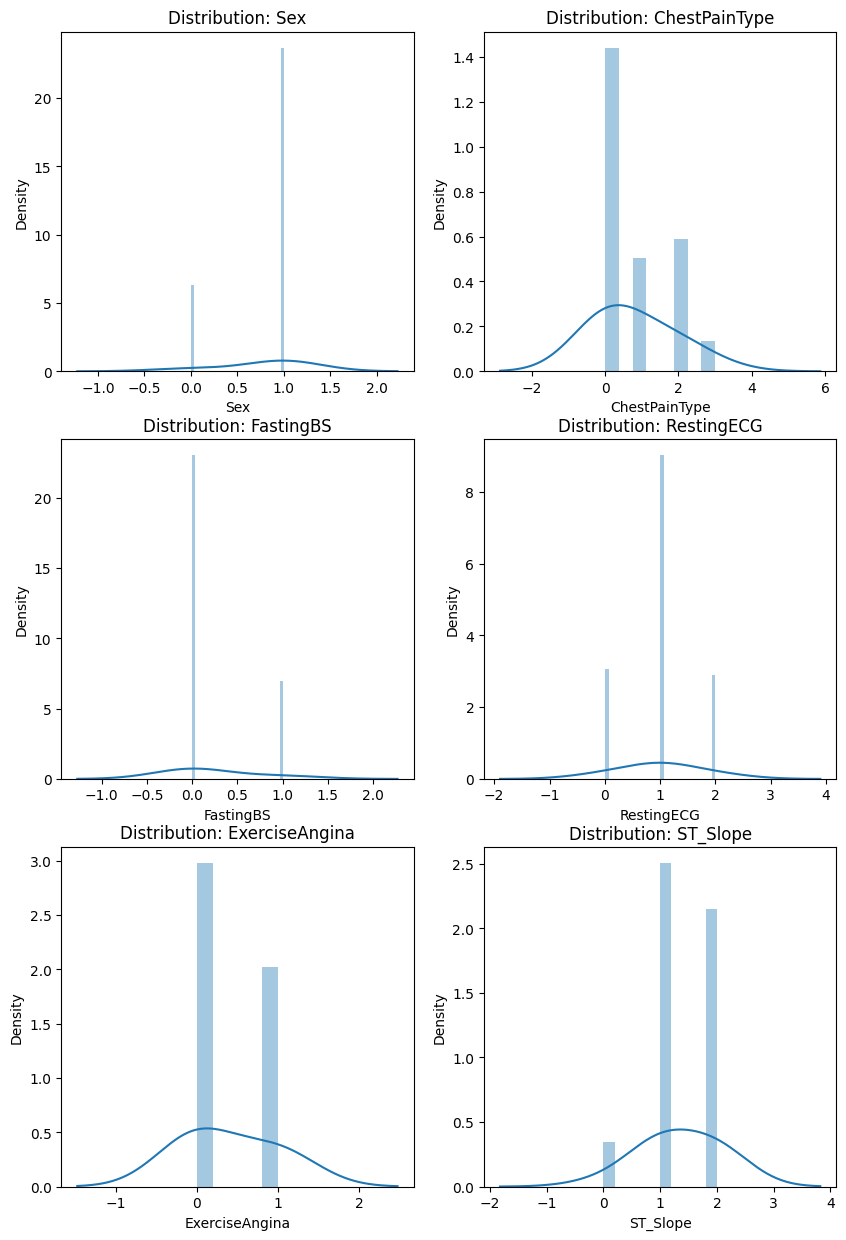

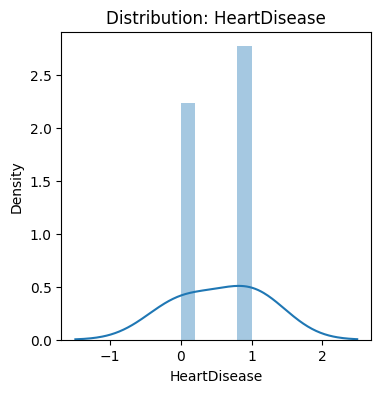

In [15]:
# Distribution of Categorical features 
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,15))
n=len(cf)

for i in range(n-1):
    plt.subplot(3,2,i+1)
    sns.distplot(df1[cf[i]], kde_kws={'bw':1})
    title='Distribution: '+cf[i]
    plt.title(title)
    
plt.figure(figsize=(4,4))
sns.distplot(df1[cf[n-1]], kde_kws={'bw':1})
title='Distribution: '+cf[n-1]
plt.title(title)

All the categorical features are near about **Normally Distributed**.

Text(0.5, 1.0, 'Distribution: Oldpeak')

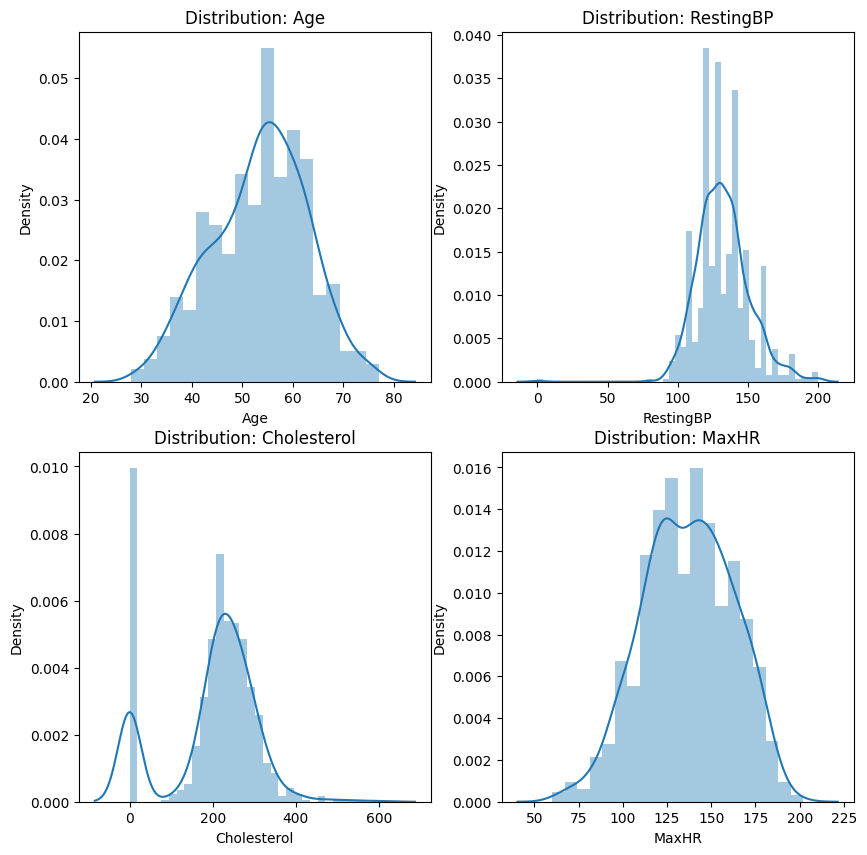

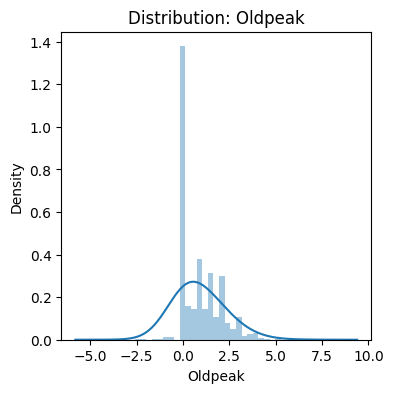

In [16]:
#Distribution of Numerical Features
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(10,10))
n=len(nf)

for i in range(n-1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[nf[i]])
    title='Distribution: '+nf[i]
    plt.title(title)
    
plt.figure(figsize=(4,4))
sns.distplot(df1[nf[n-1]], kde_kws={'bw':1})
title='Distribution: '+nf[n-1]
plt.title(title)

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

### Target Variable Visualization: 

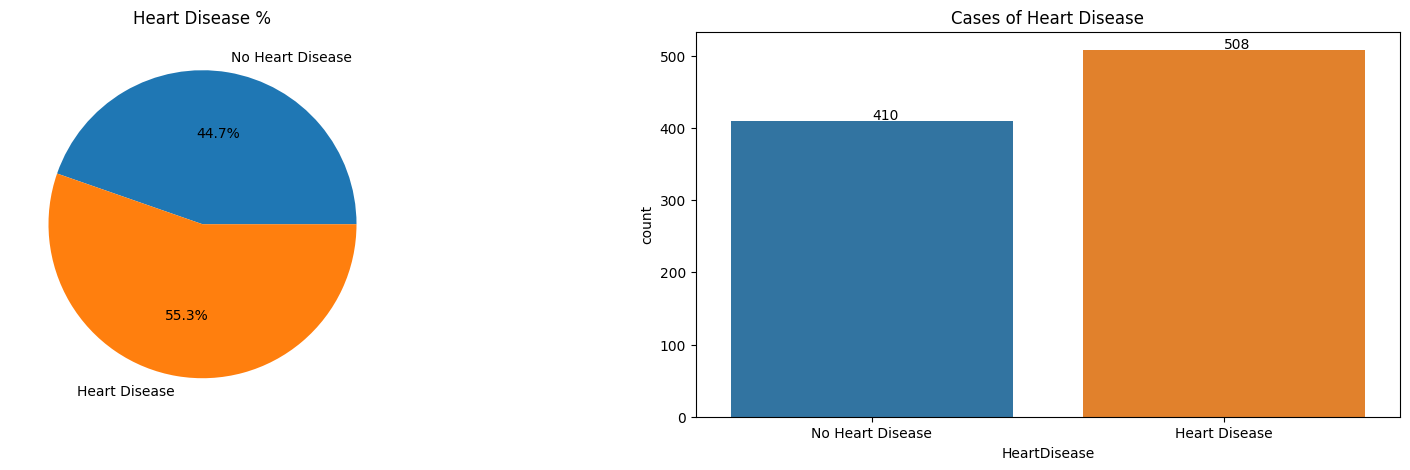

In [18]:
l=list(df['HeartDisease'].value_counts())
circle= [l[1]/sum(l)*100, l[0]/sum(l)*100]

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%')
plt.title('Heart Disease %')

plt.subplot(1,2,2)
ax=sns.countplot(x='HeartDisease', data=df)
for rect in ax.patches:
    y=int(rect.get_height())
    ax.text(rect.get_x()+rect.get_width()/2,y+2,y)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease')
plt.show()

### Categorical Features vs Target Variable:

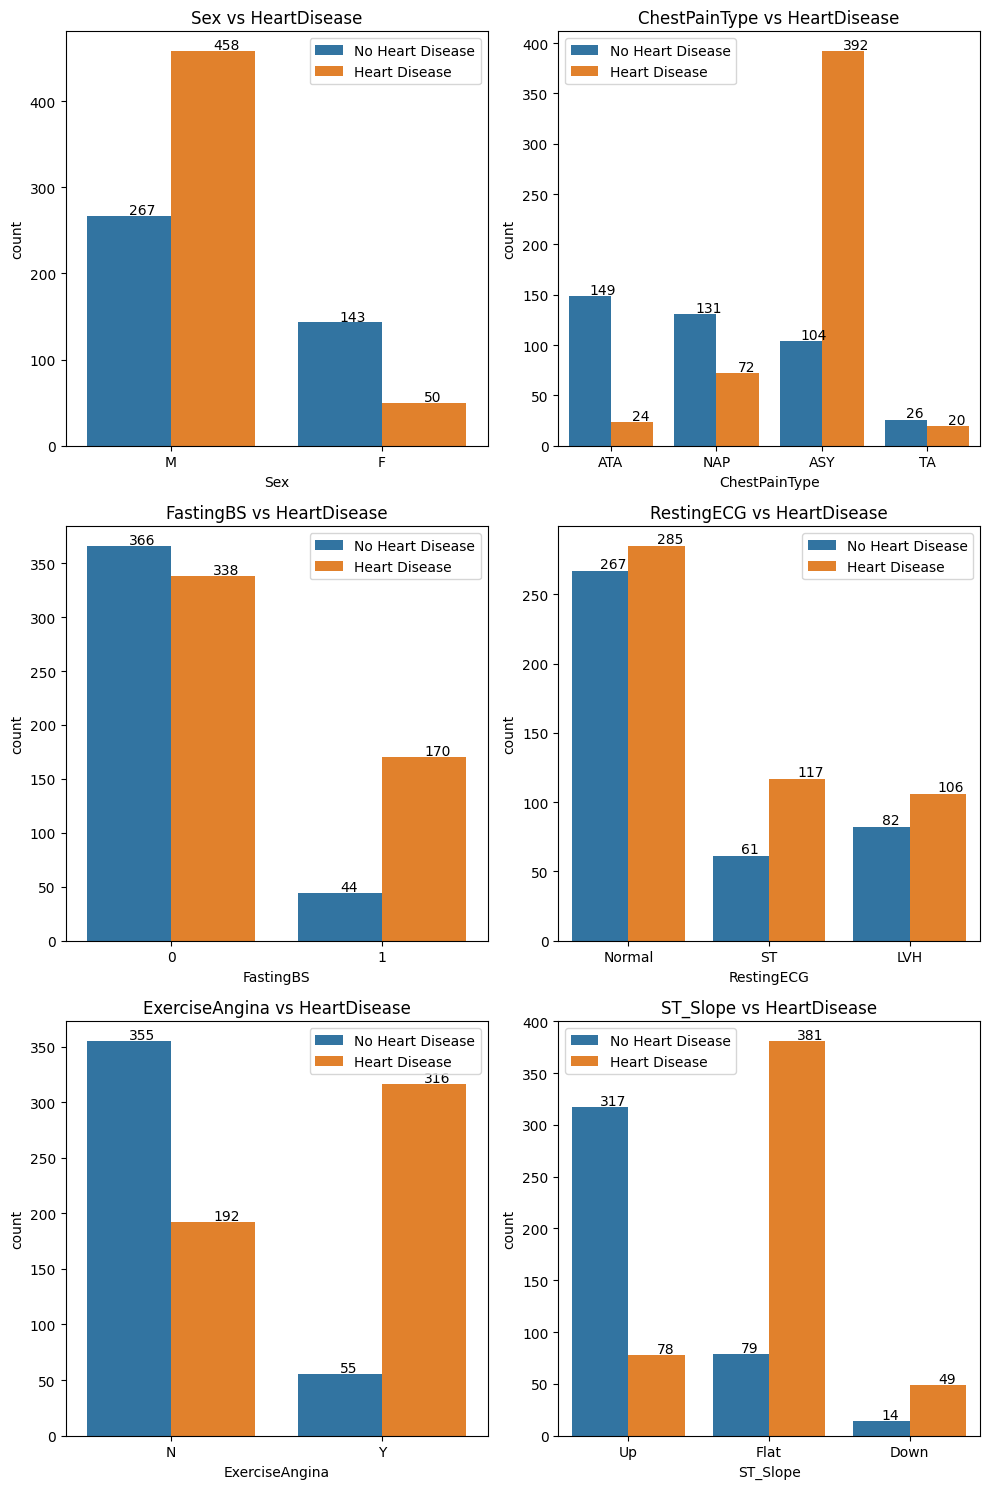

In [19]:
fig,ax= plt.subplots(nrows=3,ncols=2,figsize=(10, 15))

for i in range(len(cf)-1):
    x=i//2
    sns.countplot(x=cf[i],data=df,hue="HeartDisease", ax=ax[x,i%2])
    for rect in ax[x,i%2].patches:
        y=int(rect.get_height())
        ax[x,i%2].text(rect.get_x()+rect.get_width()/2,y+2,y)

    title=cf[i]+' vs HeartDisease'
    ax[x,i%2].legend(['No Heart Disease','Heart Disease'])
    ax[x,i%2].set_title(title)

plt.tight_layout()
plt.show()

Thus, we can infer from the graph that:
- Male(Heart Disease)> Male(Without Heart Disease)> Female(Without Heart Disease)> Female(Heart Disease) 
- ASY type of chest pain boldly points towards major chances of heart disease.
- Fasting Blood Sugar and RestingECG does not present with a clear cut category that highlights heart patients. 
- Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
- With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease.

### Categorical Features vs Positive Heart Disease Cases :

In [20]:
sex= df[df['HeartDisease']== 1]['Sex'].value_counts()
sex= [sex[0]/sum(sex)*100, sex[1]/sum(sex)*100]

cp= df[df['HeartDisease']== 1]['ChestPainType'].value_counts()
cp= [cp[0]/sum(cp)*100, cp[1]/sum(cp)*100,cp[2]/sum(cp)*100,cp[3]/sum(cp)*100]

fbs= df[df['HeartDisease']== 1]['FastingBS'].value_counts()
fbs= [fbs[0]/sum(fbs)*100, fbs[1]/sum(fbs)*100]

ecg= df[df['HeartDisease']== 1]['RestingECG'].value_counts()
ecg= [ecg[0]/sum(ecg)*100,ecg[1]/sum(ecg)*100,ecg[2]/sum(ecg)*100]

exang= df[df['HeartDisease']== 1]['ExerciseAngina'].value_counts()
exang= [exang[0]/sum(exang)*100, exang[1]/sum(exang)*100]

slope= df[df['HeartDisease']== 1]['ST_Slope'].value_counts()
slope= [slope[0]/sum(slope)*100, slope[1]/sum(slope)*100, slope[2]/sum(slope)*100]

Text(0.5, 1.0, 'ST_Slope')

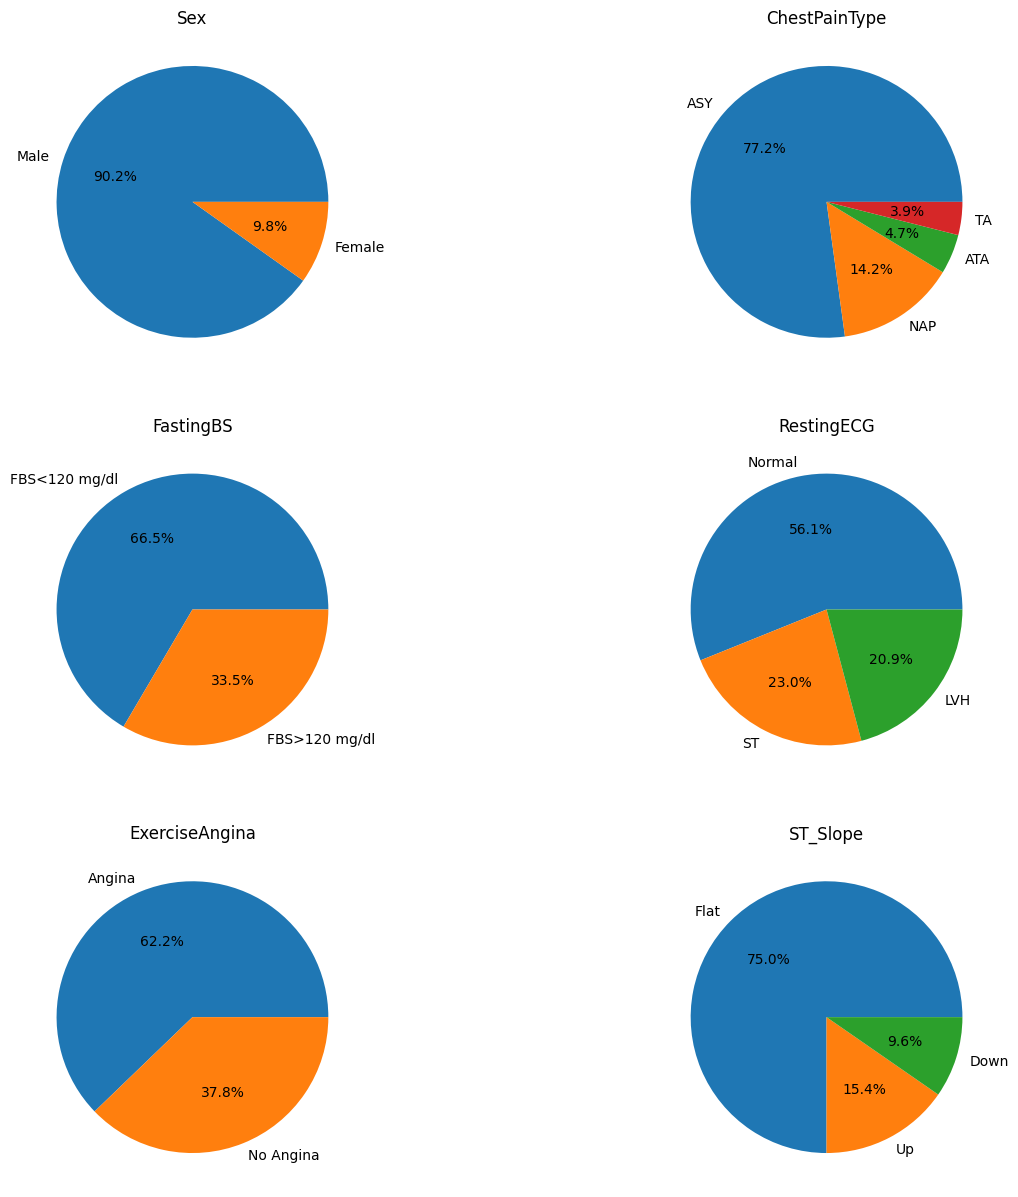

In [21]:
ax,fig= plt.subplots(nrows=4,ncols=2,figsize=(15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Sex')

plt.subplot(3,2,2)
plt.pie(cp,labels=['ASY','NAP','ATA','TA'], autopct='%1.1f%%')
plt.title('ChestPainType')

plt.subplot(3,2,3)
plt.pie(fbs,labels=['FBS<120 mg/dl','FBS>120 mg/dl'], autopct='%1.1f%%')
plt.title('FastingBS')

plt.subplot(3,2,4)
plt.pie(ecg,labels=['Normal','ST','LVH'], autopct='%1.1f%%')
plt.title('RestingECG')

plt.subplot(3,2,5)
plt.pie(exang,labels=['Angina','No Angina'], autopct='%1.1f%%')
plt.title('ExerciseAngina')

plt.subplot(3,2,6)
plt.pie(slope,labels=['Flat','Up','Down'], autopct='%1.1f%%')
plt.title('ST_Slope')

- Out of all the heart disease patients, a staggering 90% patients are Male.
- When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
- Fasting Blood Sugar level <120 mg/dl displays high chances of heart diseases.
- Detection of Exercise Induced Angina also points towards heart diseases.
- In ST_Slope readings, Flat level holds 75% that may assist in detecting underlying heart problems. 

### Numerical Features vs Target Variable:

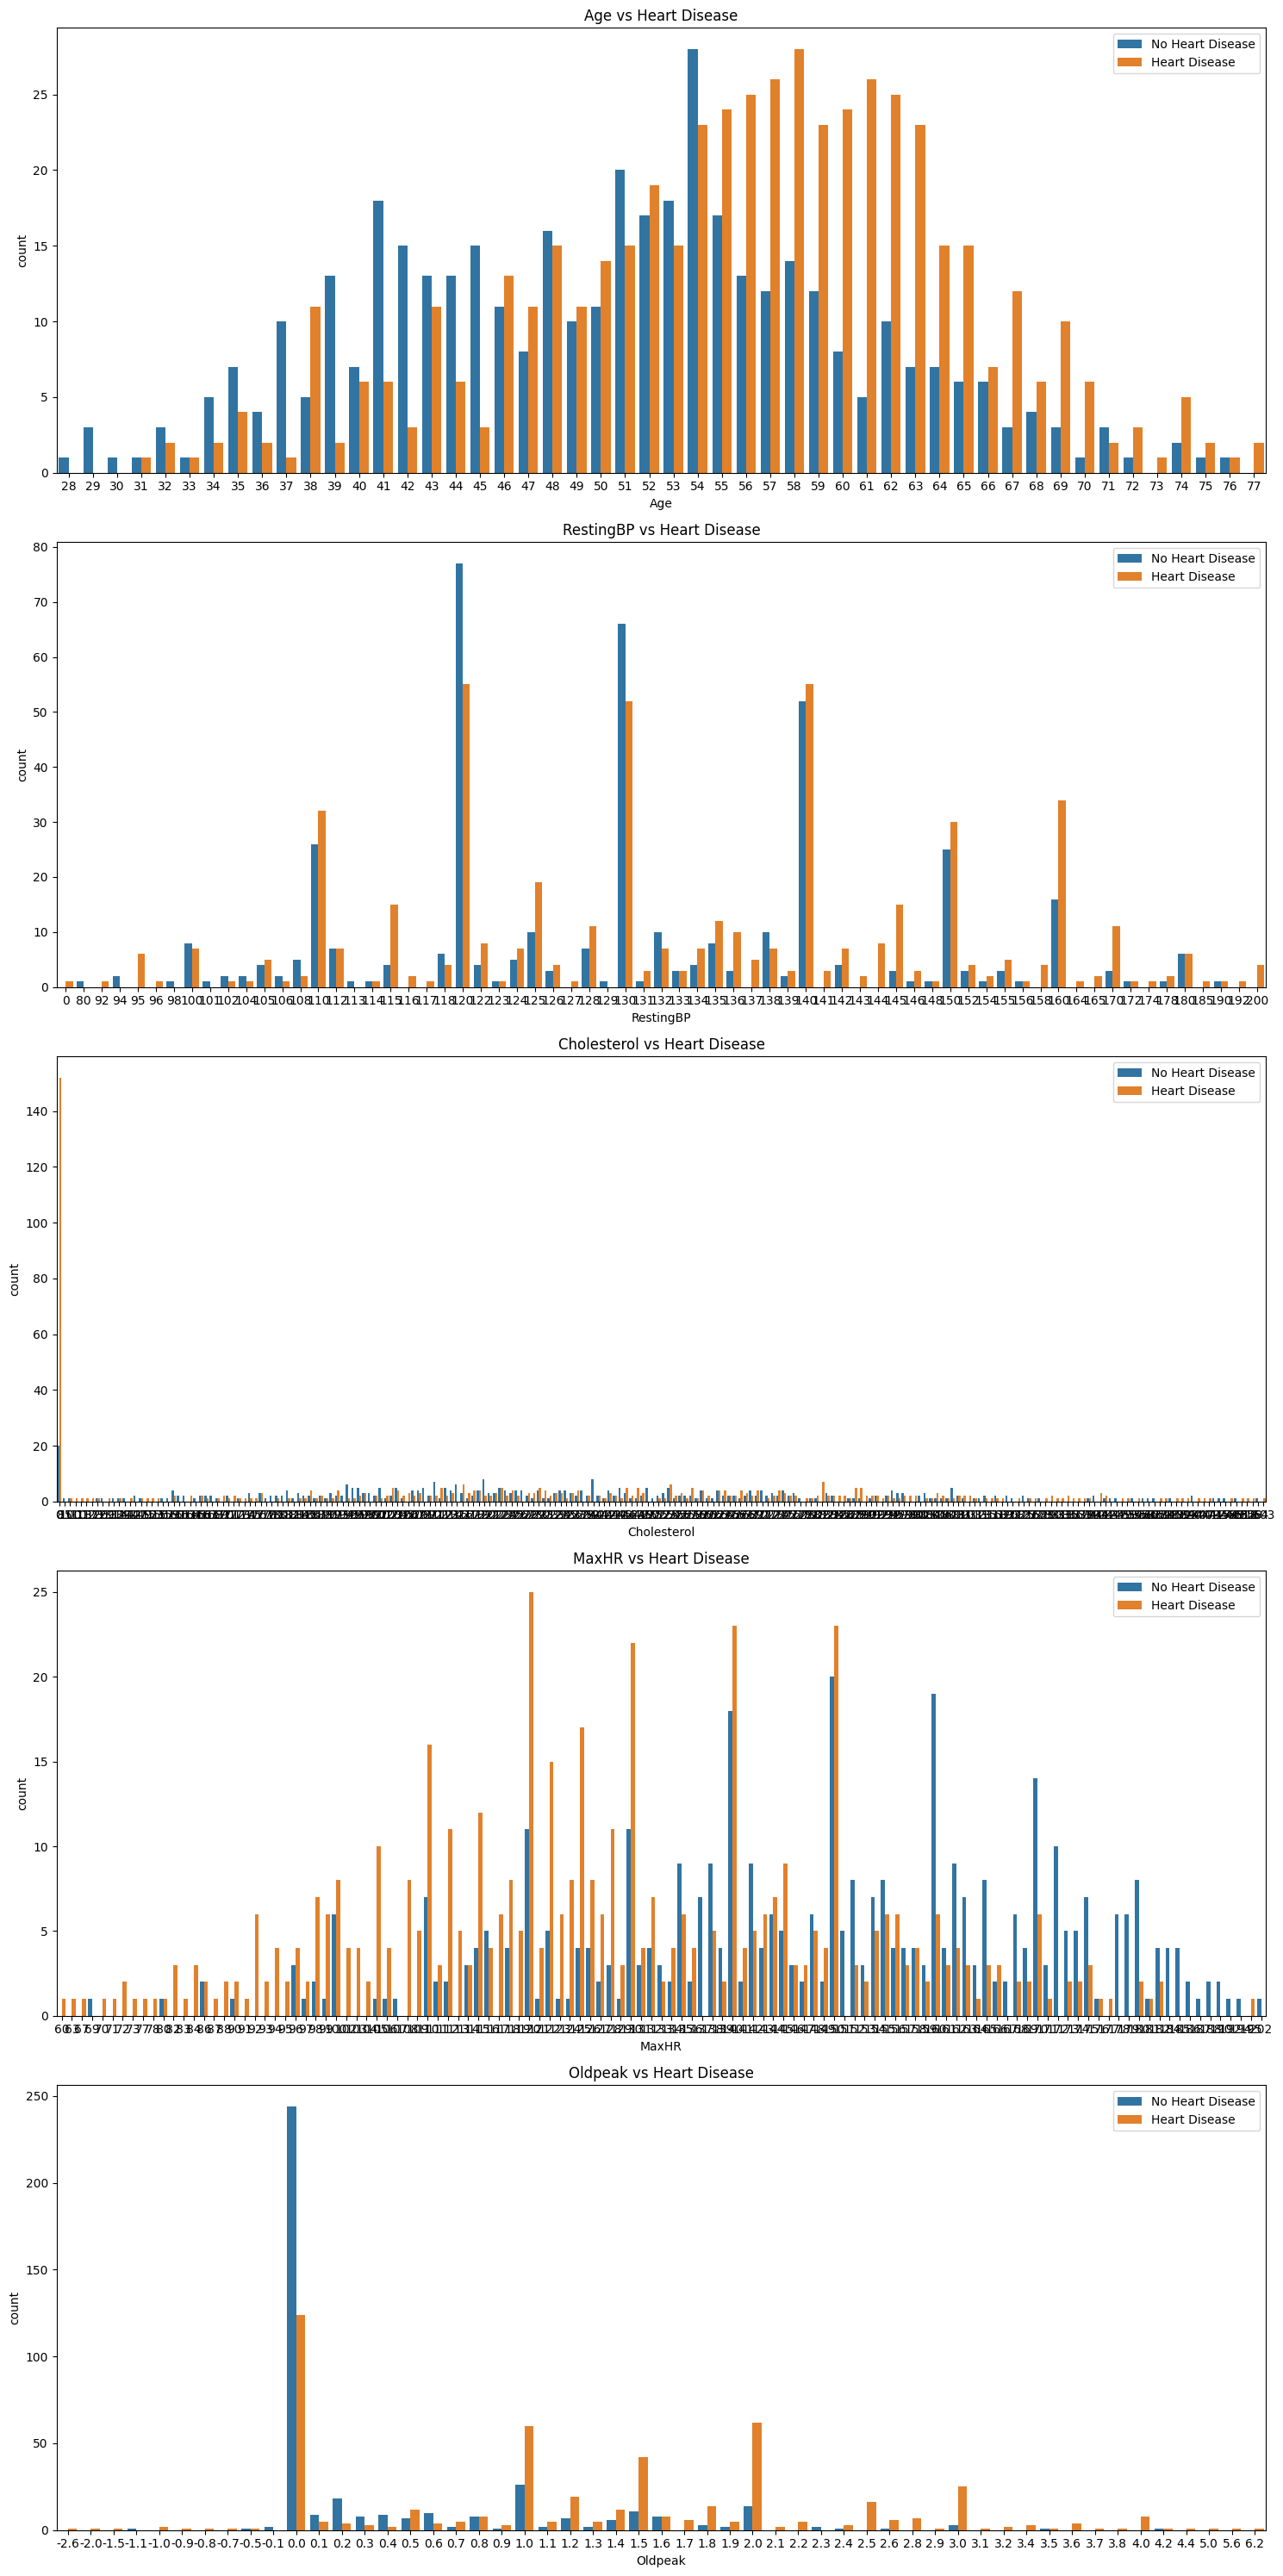

In [22]:
fig,ax= plt.subplots(nrows=5,ncols=1,figsize=(15,30))

for i in range(len(nf)):
    sns.countplot(x=nf[i],data=df,hue="HeartDisease", ax=ax[i])
    title=nf[i]+' vs Heart Disease'
    ax[i].legend(['No Heart Disease','Heart Disease'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

- Because of too many unique data points in the above features, it is difficult to gain any type of insight. So, we convert these numerical features(except age), into categorical features for understandable visualization and gaining insights purpose. Thus, we scale the individual values of these features which represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition. 

In [23]:
df['RestingBP_Group'] = [int(i/5) for i in df['RestingBP']]
df['Cholesterol_Group'] = [int(i/10) for i in df['Cholesterol']]
df['MaxHR_Group'] = [int(i/5) for i in df['MaxHR']]
df['Oldpeak_Group'] = [ int((i*10)/5) for i in df['Oldpeak']]

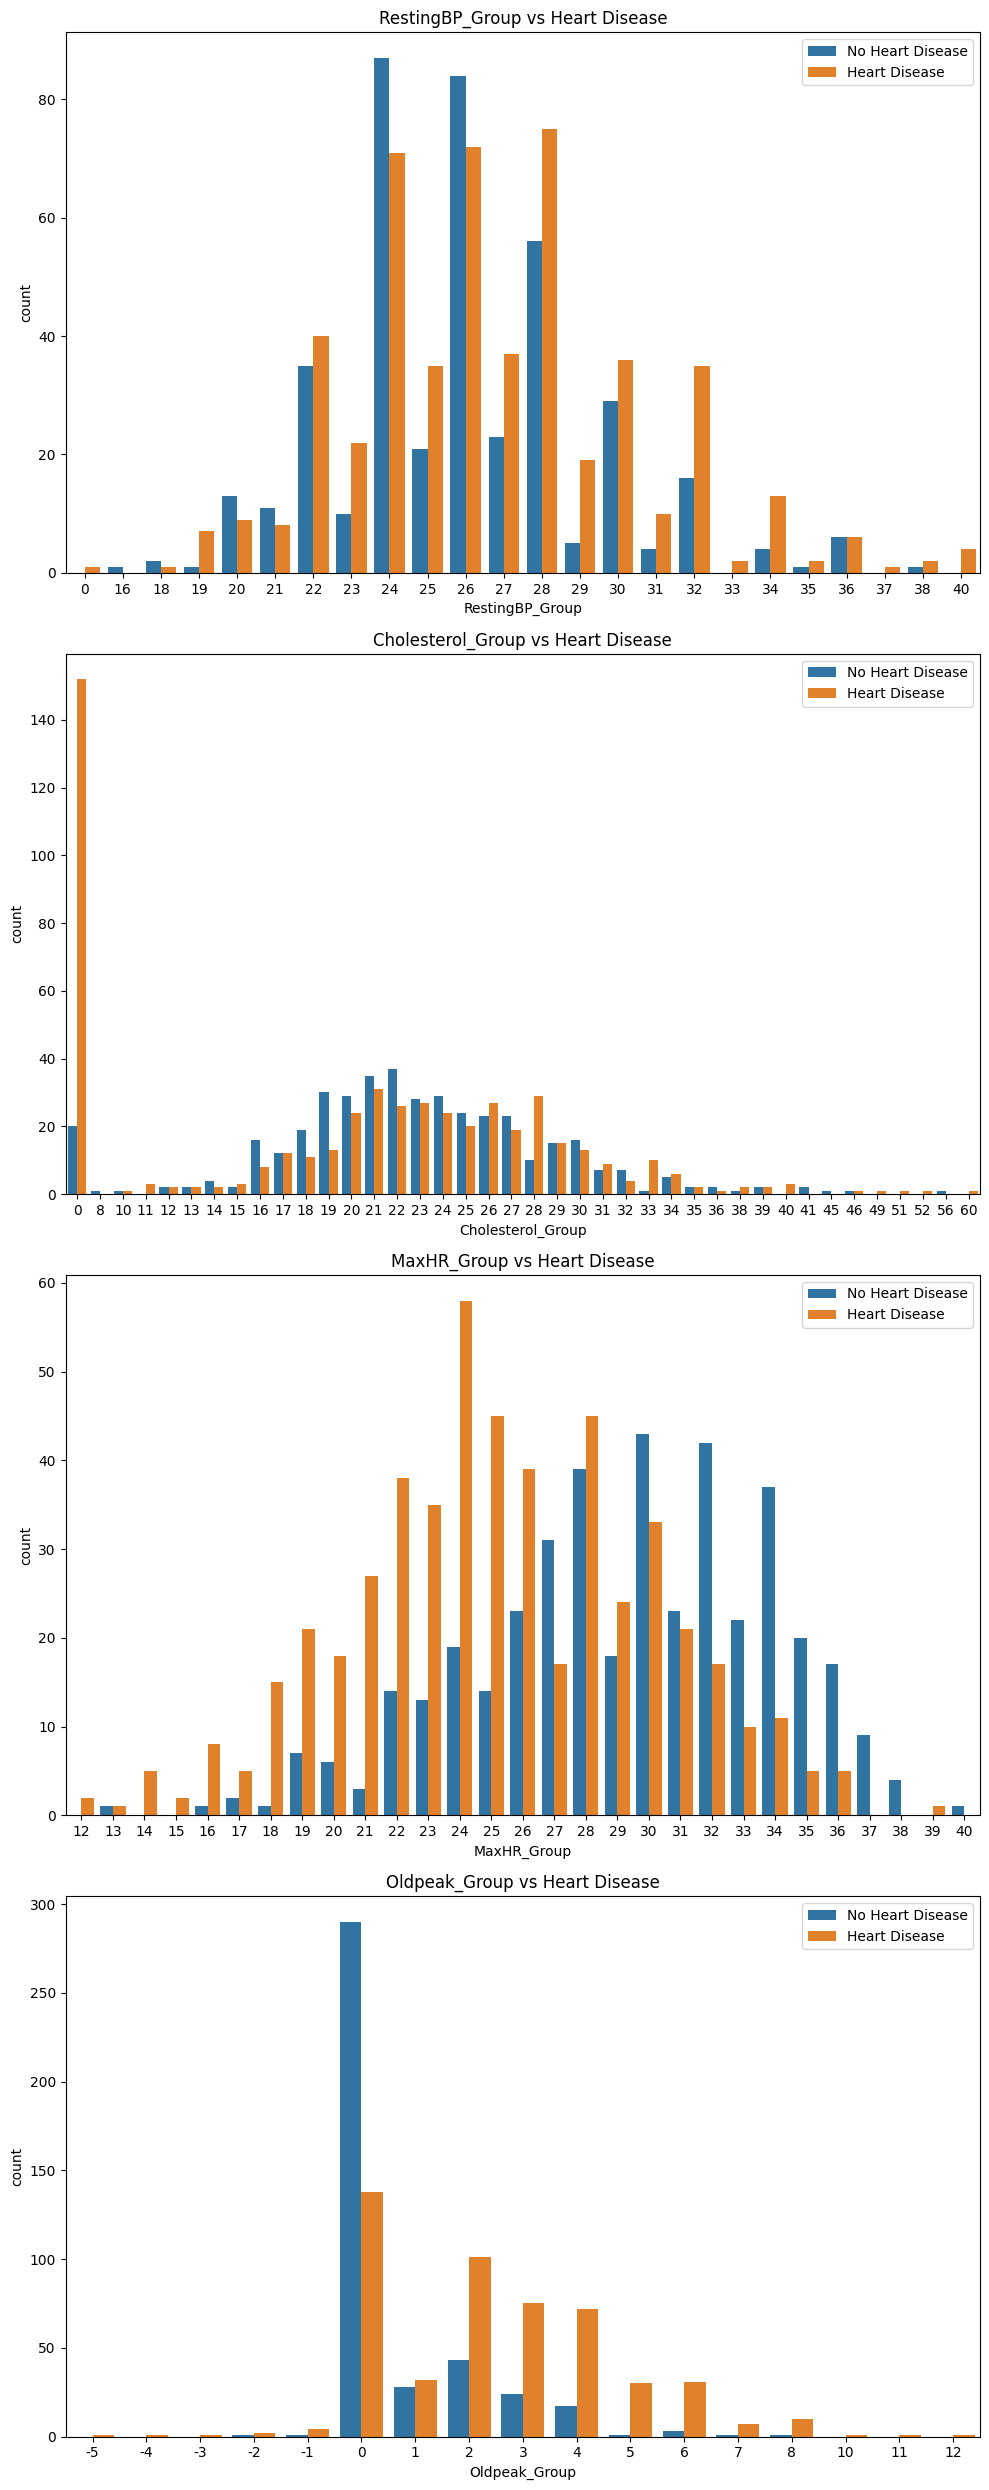

In [24]:
fig,ax= plt.subplots(nrows=4, ncols=1, figsize=(10,25))
group_nf= [i+'_Group' for i in nf[1:]]

for i in range(len(group_nf)):
    sns.countplot(x=group_nf[i],data=df,hue="HeartDisease",ax=ax[i])
    ax[i].legend(['No Heart Disease','Heart Disease'])
    title= group_nf[i]+' vs Heart Disease'
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

- In RestingBP group data, **95(19x5) - 170(34x5)** readings are most prone to be detected with heart diseases.
- Cholesterol levels between **160(16x10) - 340(34x10)** are highly susceptible to heart diseases.
- Oldpeak, MaxHR values displays the heart diseases throughout. 

### <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Numerical features vs Categorical features (wrt Target variable)</div> 

#### Sex vs Numerical Features :

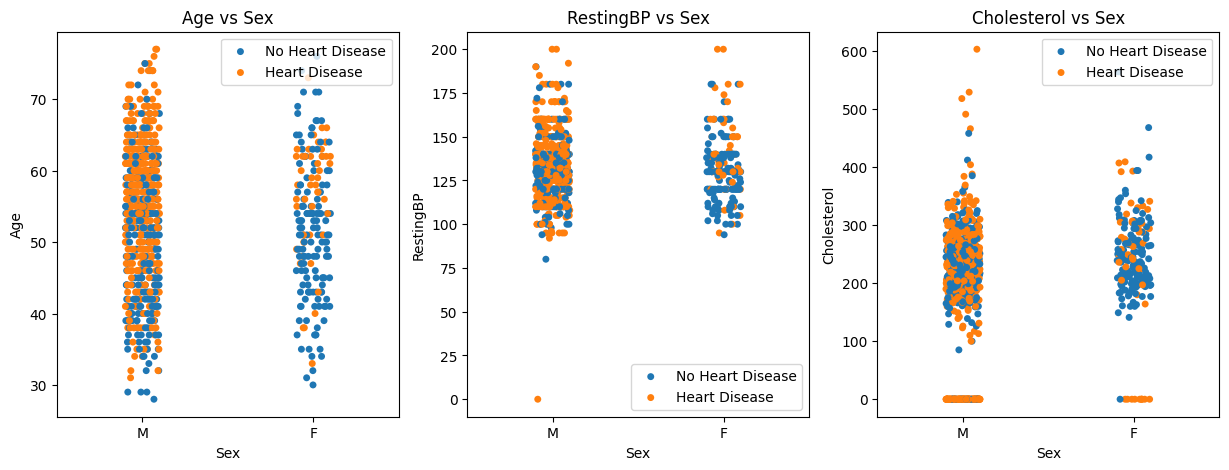

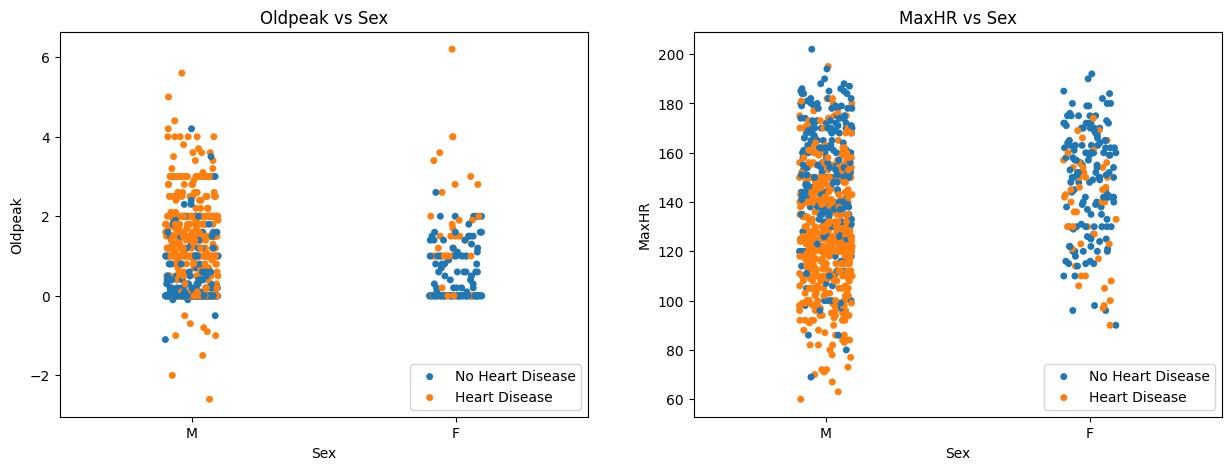

In [25]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='Sex',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs Sex' 
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='Sex',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs Sex' 
    plt.title(title)

#### ChestPainType vs Numerical Features :

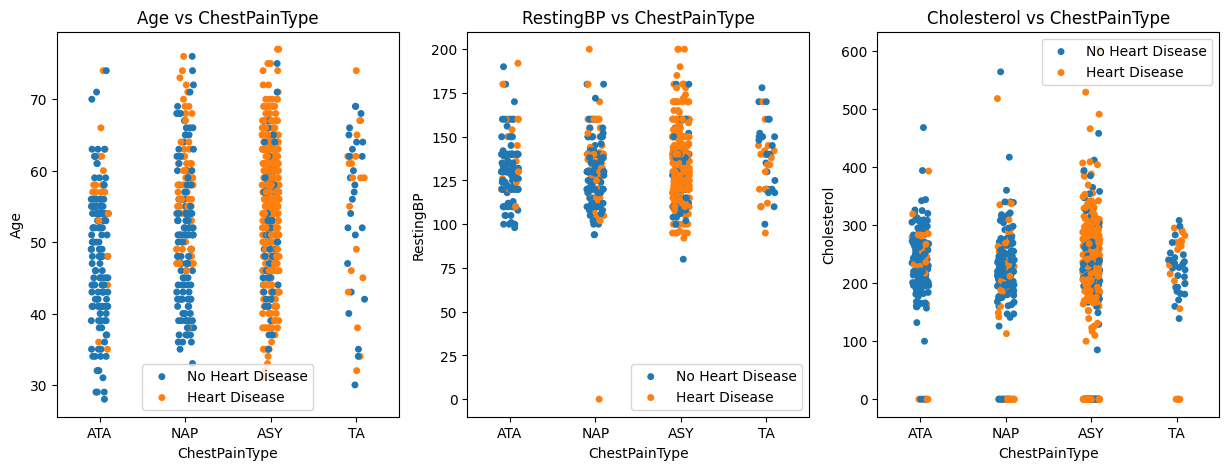

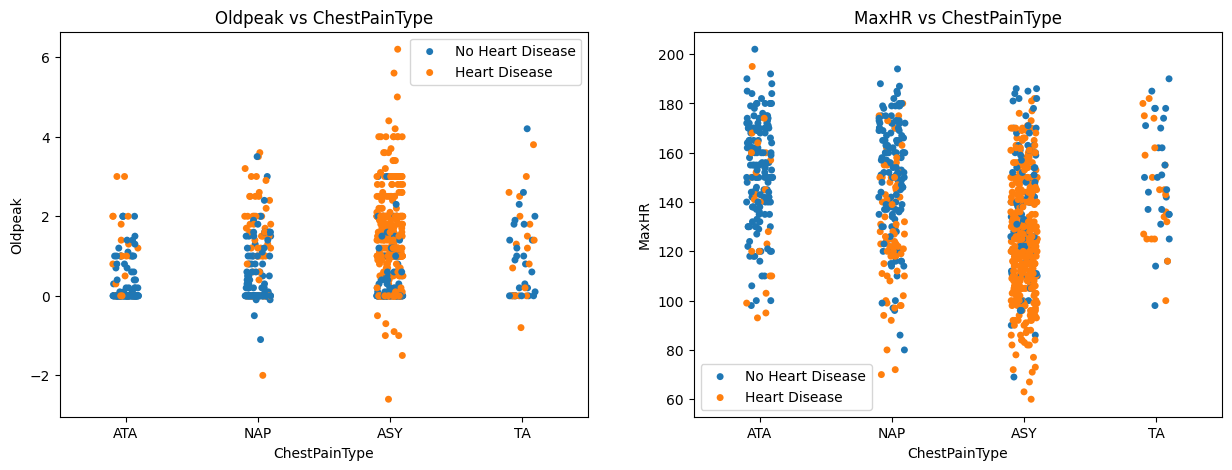

In [28]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='ChestPainType',y=nf[i],data=df, hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ChestPainType'
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='ChestPainType',y=nf[i],data=df, hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ChestPainType' 
    plt.title(title)

**ASY** type of chest pain dominates other types of chest pain in all the numerical features.

#### FastingBS vs Numerical features :

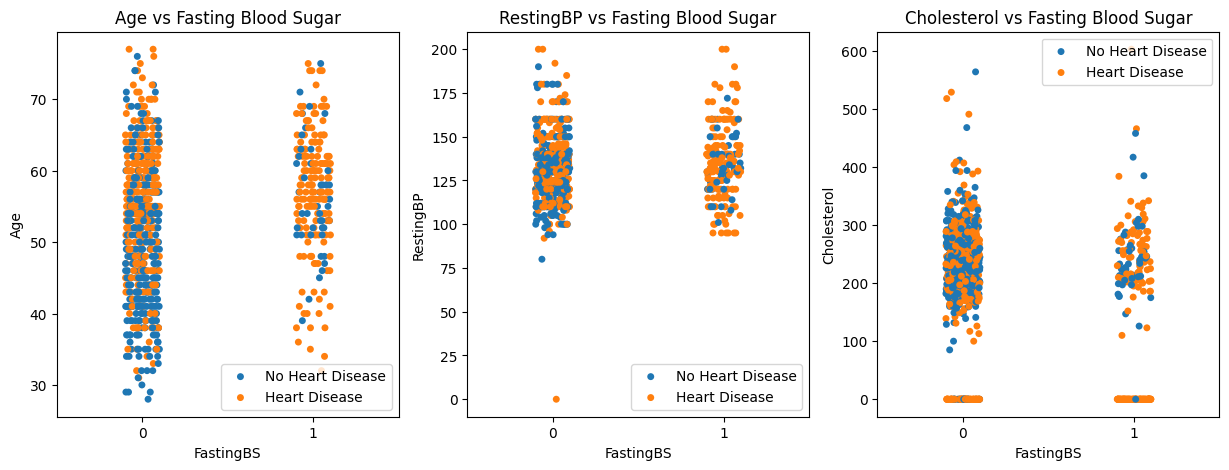

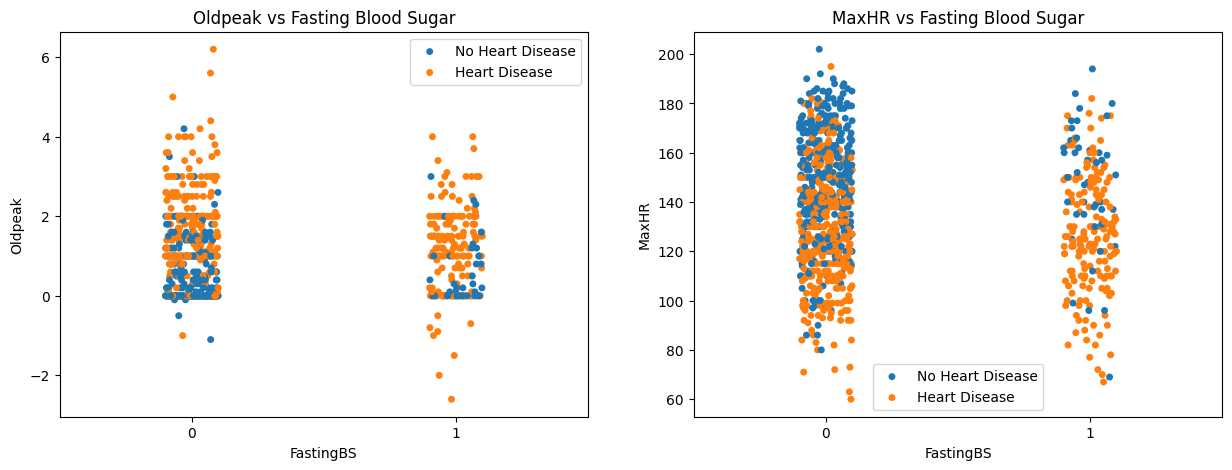

In [27]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='FastingBS',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs Fasting Blood Sugar' 
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='FastingBS',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs Fasting Blood Sugar' 
    plt.title(title)

#### RestingECG vs Numerical Features :

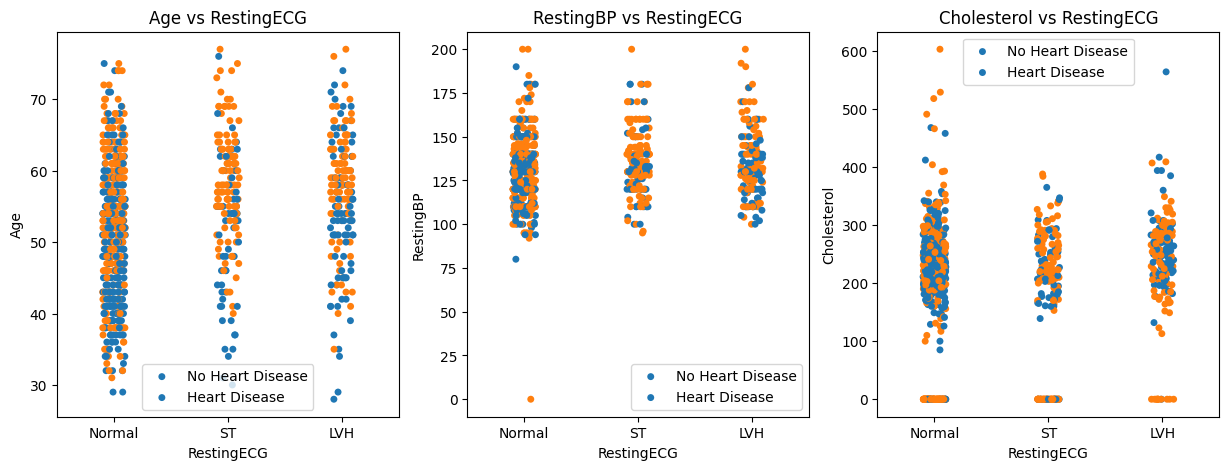

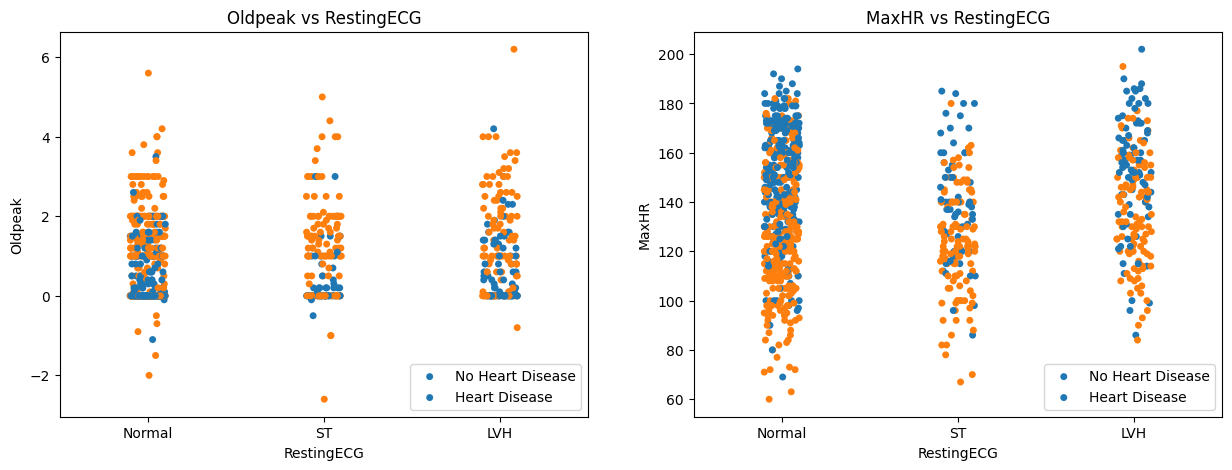

In [26]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='RestingECG',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs RestingECG' 
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='RestingECG',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs RestingECG' 
    plt.title(title)

#### ExerciseAngina vs Numerical Features :

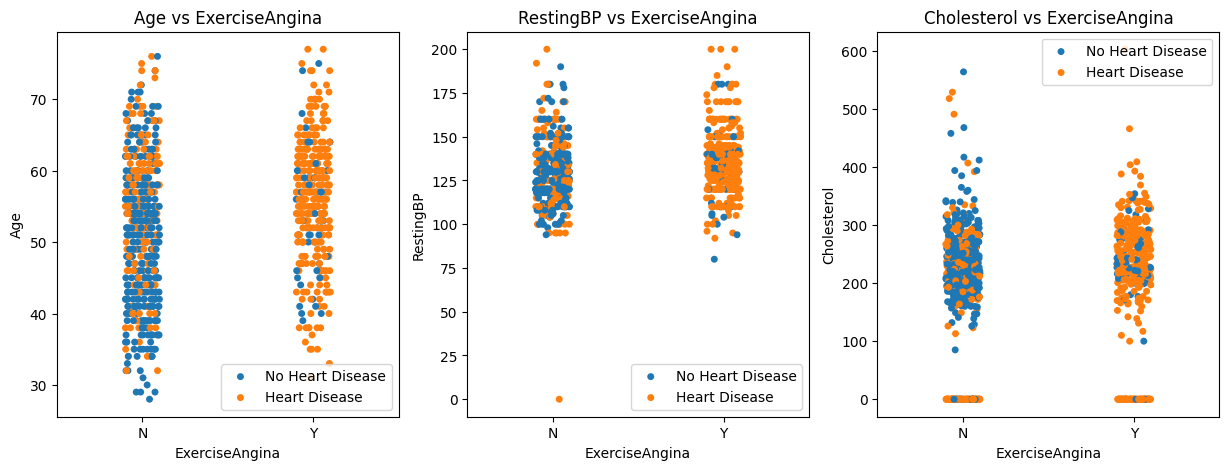

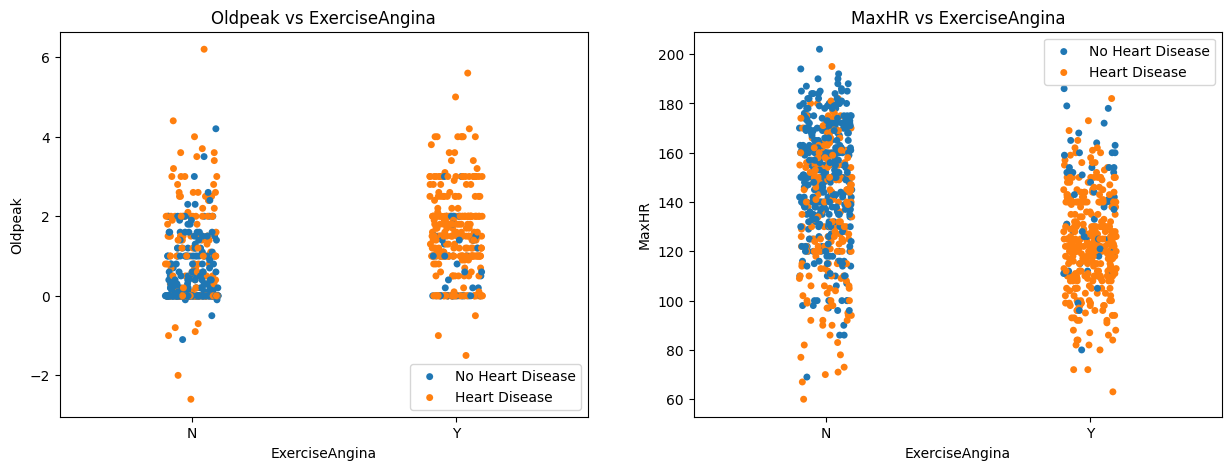

In [29]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='ExerciseAngina',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ExerciseAngina'
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='ExerciseAngina',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ExerciseAngina' 
    plt.title(title)

A positive co-relation exists between **Heart Disease** and **Exercise induced Angina**.

#### ST_Slope vs Numerical Features :

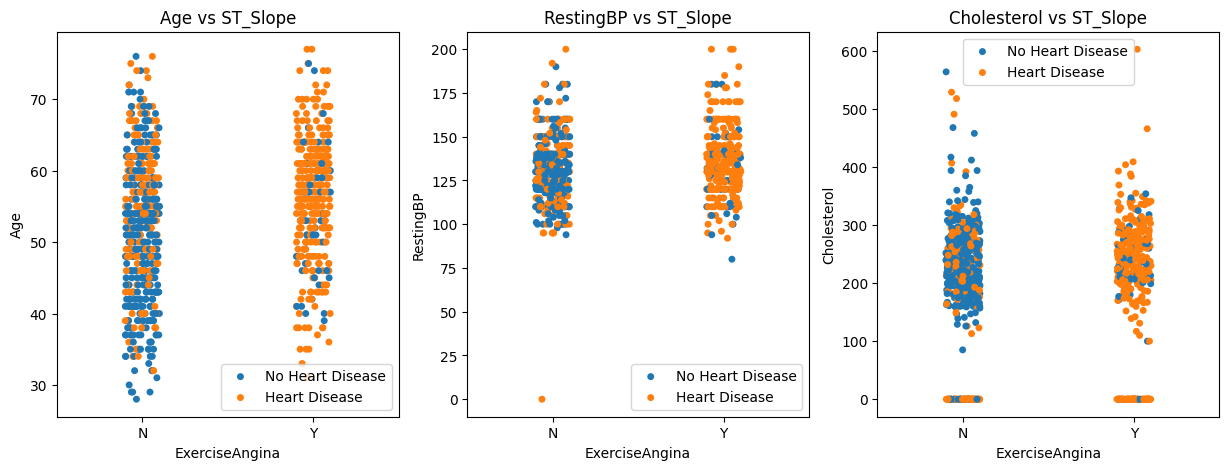

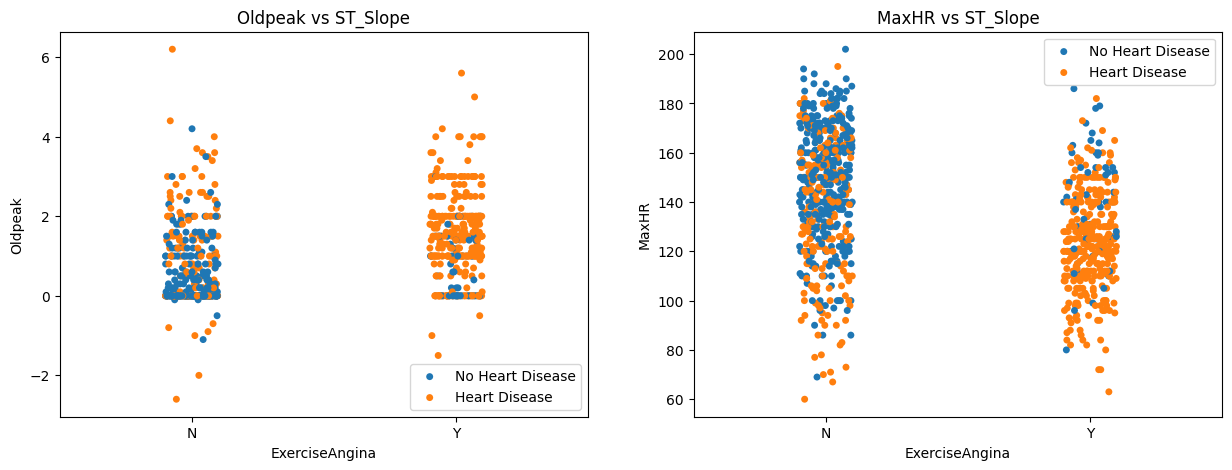

In [31]:
fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x='ExerciseAngina',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ST_Slope'
    plt.title(title)

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x='ExerciseAngina',y=nf[i],data=df,hue='HeartDisease')
    plt.legend(['No Heart Disease','Heart Disease'])
    title= nf[i]+' vs ST_Slope' 
    plt.title(title)

- Positive correlation is observed between **ST_Slope** value and **Heart Disease** cases. 
- **Flat**, **Down** and **Up** displays high, middle and low probability of being diagnosed with heart diseases respectively.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

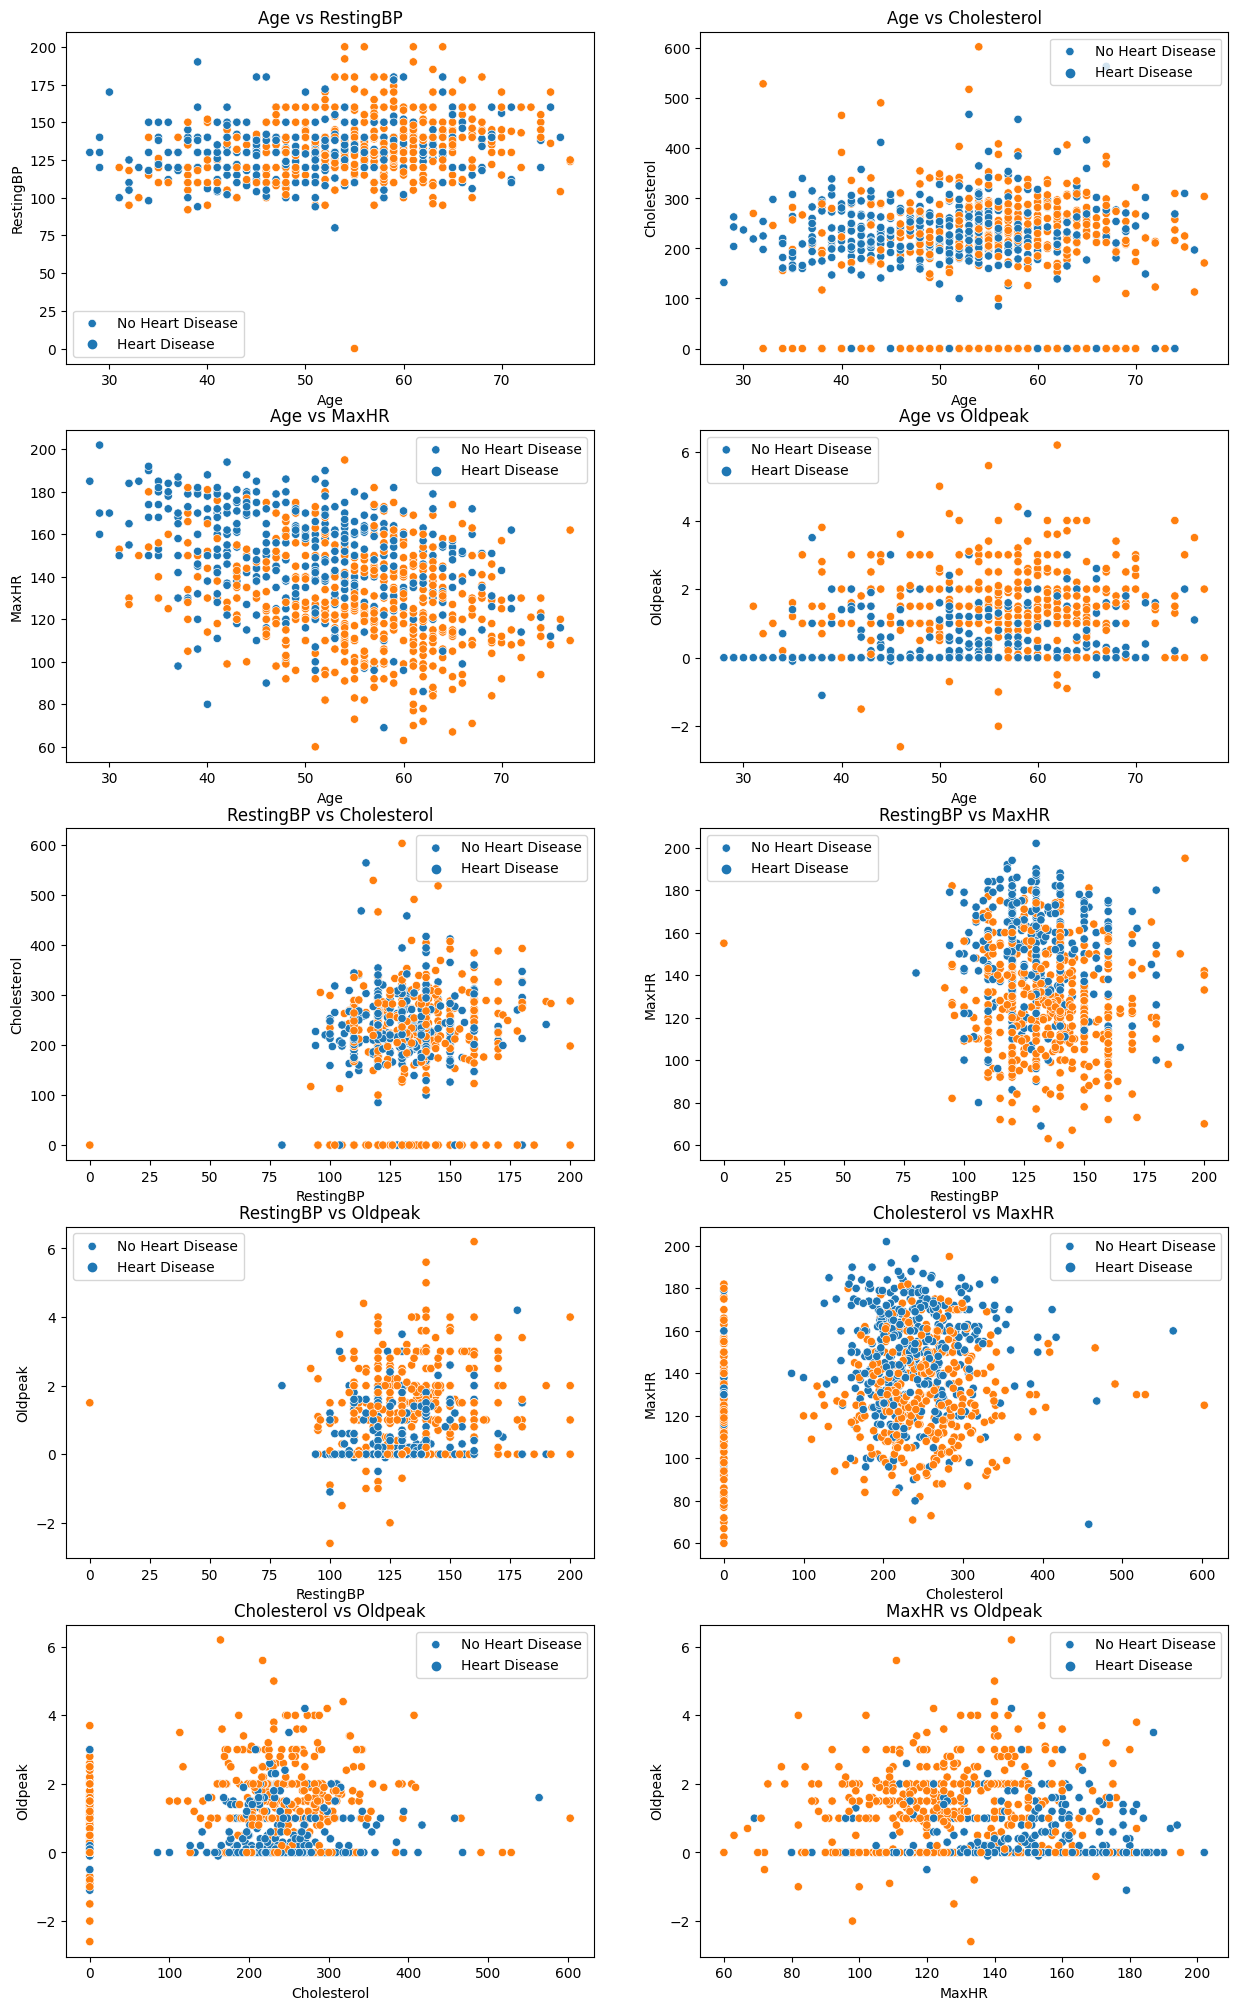

In [30]:
a= 0
fig,ax= plt.subplots(nrows=5,ncols=2,figsize=(15,25))
for i in range(len(nf)):
    for j in range(len(nf)):
        if i!=j and j>i:
            a+=1
            plt.subplot(5,2,a)
            sns.scatterplot(x=nf[i],y=nf[j],data=df,hue='HeartDisease')
            plt.legend(['No Heart Disease','Heart Disease'])
            title=nf[i]+' vs '+nf[j]
            plt.title(title)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'RestingBP_Group'}>,
        <Axes: title={'center': 'Cholesterol_Group'}>],
       [<Axes: title={'center': 'MaxHR_Group'}>,
        <Axes: title={'center': 'Oldpeak_Group'}>, <Axes: >]],
      dtype=object)

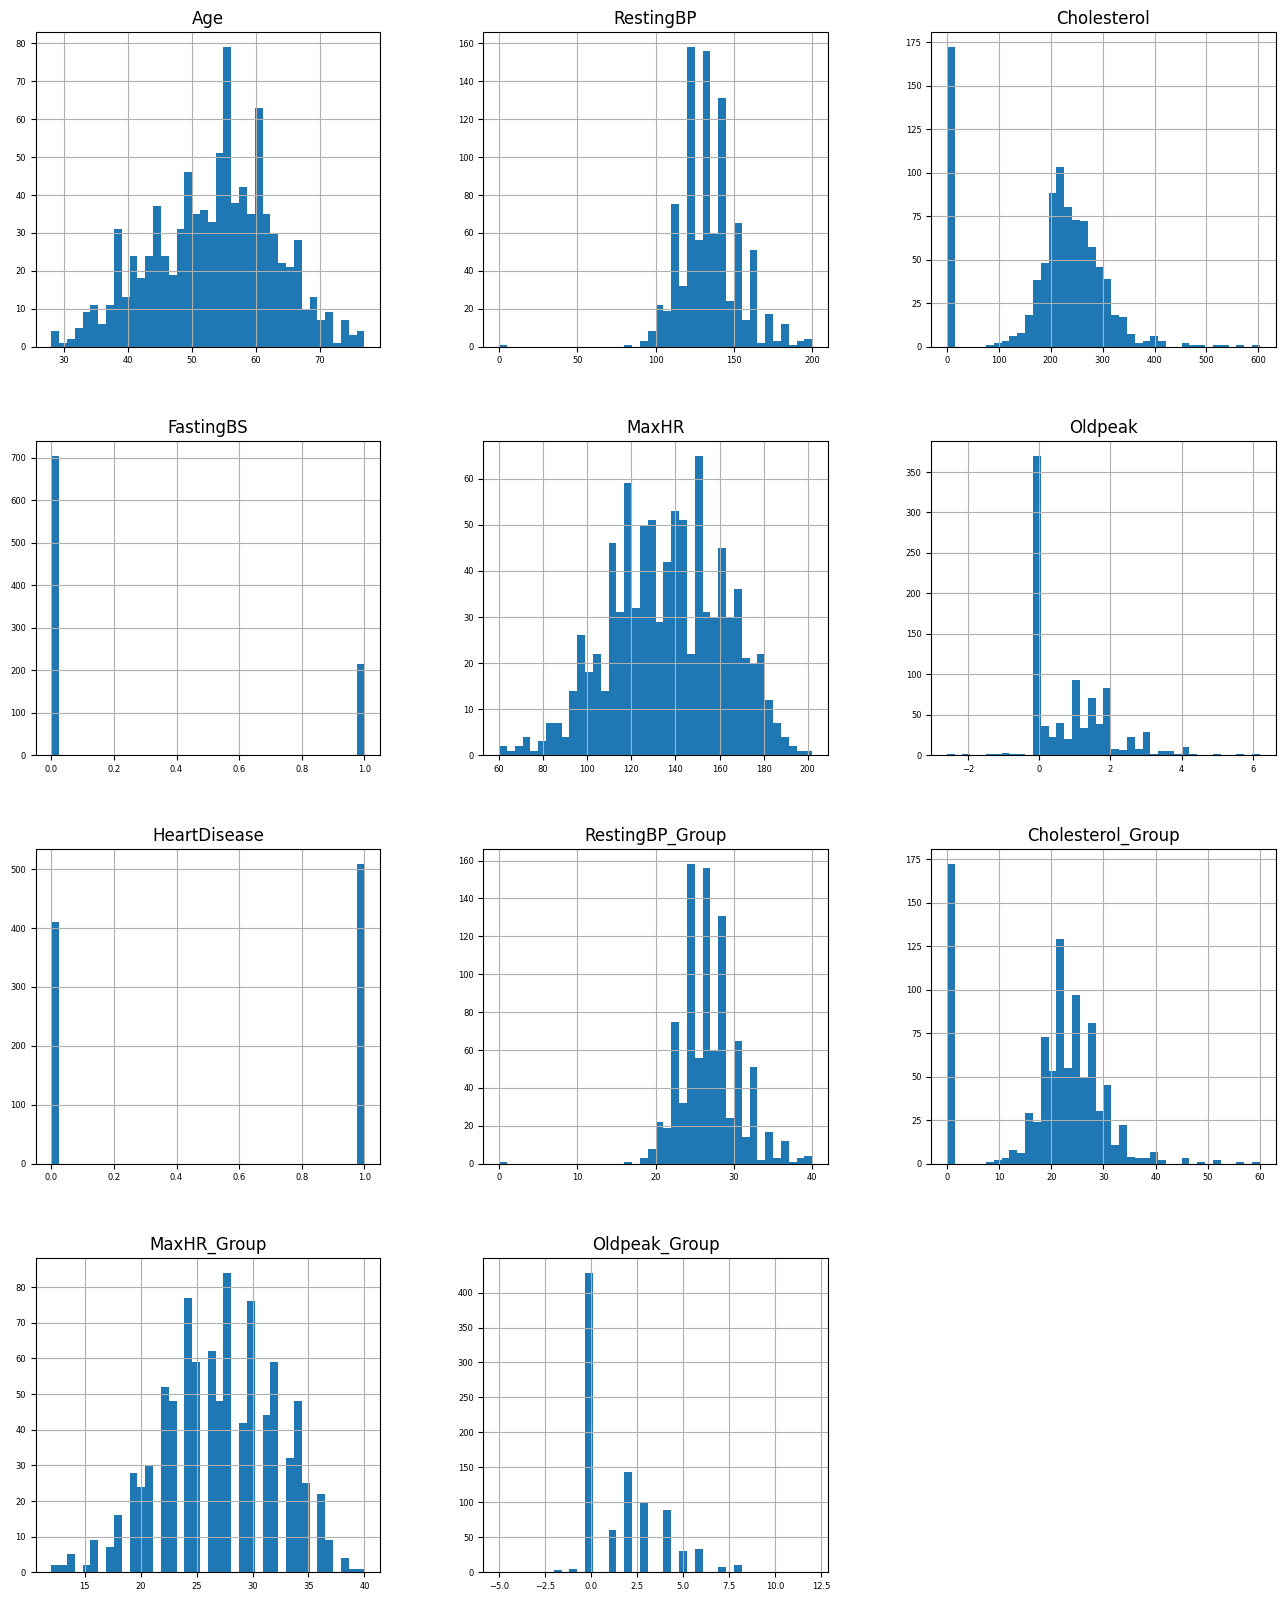

In [54]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

### <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Summary of EDA:</div>

<b>High Risk of Heart Disease is experienced in following Cases:</b>

<p div style="font-family: Times New Roman;">
<b> Categorical Features (Range) :</b>
<br>
- Sex: Male > Female <br>
- ChestPainType: ASY > NAP > ATA > TA <br>
- FastingBS: (FBS<120mg/dl) > (FBS > 120 mg/dl) <br>
- RestingECG: Normal > ST > LVH <br>
- ExerciseAngina: Angina > No Angina <br>
- ST_Slope: Flat > Up > Down <br><br>
 

<p div style="font-family: Times New Roman;">
<b> Numerical Features (Range) :</b>
<br>
- Age: 50+ <br>
- RestingBP: 100 - 175 <br>
- Cholesterol level: 200 - 300 <br>
- Max Heart Rate: Less than 160 <br>
- Positive OldPeak value <br>
</p>

</p>

## <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Feature Engineering</div>

### Data Scaling :

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms= MinMaxScaler() # Normalization
ss= StandardScaler() # Standardization

df1['Oldpeak']= mms.fit_transform(df1[['Oldpeak']])
df1['Age']= ss.fit_transform(df1[['Age']])
df1['RestingBP']= ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol']= ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR']= ss.fit_transform(df1[['MaxHR']])

In [35]:
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS   
0 -1.433140    1              1   0.410909     0.825070          0  \
1 -0.478484    0              2   1.491752    -0.171961          0   
2 -1.751359    1              1  -0.129513     0.770188          0   
3 -0.584556    0              0   0.302825     0.139040          0   
4  0.051881    1              2   0.951331    -0.034755          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.382928               0  0.295455         2             0  
1           1  0.754157               0  0.409091         1             1  
2           2 -1.525138               0  0.295455         2             0  
3           1 -1.132156               1  0.465909         1             1  
4           1 -0.581981               0  0.295455         2             0

<p>
- <b>Normalization:</b> Oldpeak feature is normalized as it had displayed a right skewed data distribution. <br>
- <b>Standardizarion:</b> Age, RestingBP, Cholesterol and MaxHR features are scaled down as they are normally distributed.
</p>

### Correlation Matrix :

<Axes: >

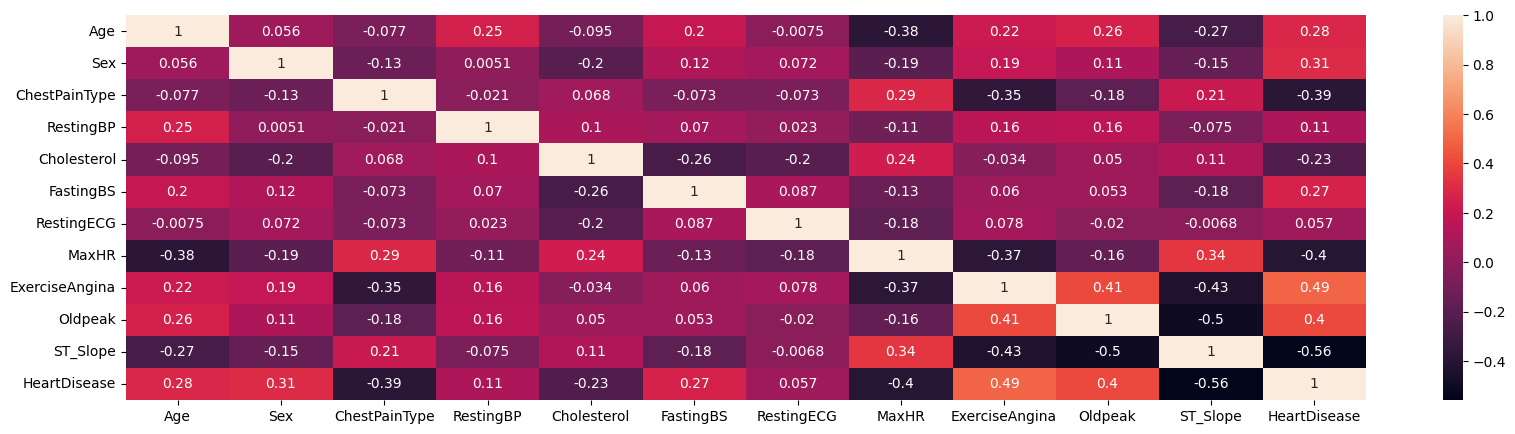

In [37]:
plt.figure(figsize= (20,5))
sns.heatmap(df1.corr(), annot=True)

Text(0.5, 1.0, 'Correlation wrt HeartDisease')

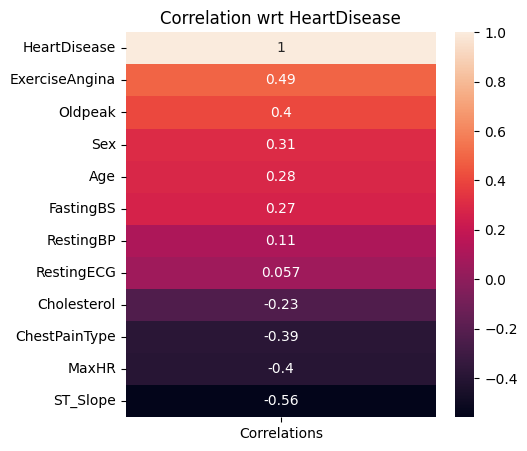

In [38]:
corr= df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']

plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True)
plt.title('Correlation wrt HeartDisease')

Except **RestingBP** and **RestingECG**, every feature posses some relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Text(0.5, 1.0, 'Selection of Categorical Features')

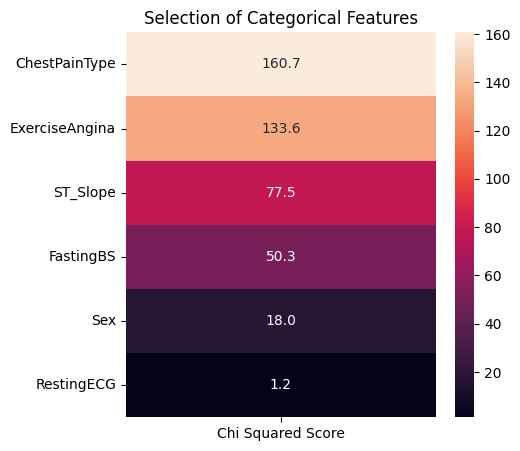

In [40]:
# Chi Square Test

x= df1.loc[:,cf[:-1]]
y= df1.loc[:,cf[-1]]

best_x= SelectKBest(score_func=chi2,k='all')
fit= best_x.fit(x,y)

score= pd.DataFrame(data=fit.scores_,index=list(x.columns),columns=['Chi Squared Score']) 
plt.subplots(figsize=(5,5))
sns.heatmap(score.sort_values(ascending=False,by='Chi Squared Score'),annot=True,fmt='.1f')
plt.title('Selection of Categorical Features')

### Feature Selection for Numerical Features :

Text(0.5, 1.0, 'Selection of Numerical Features')

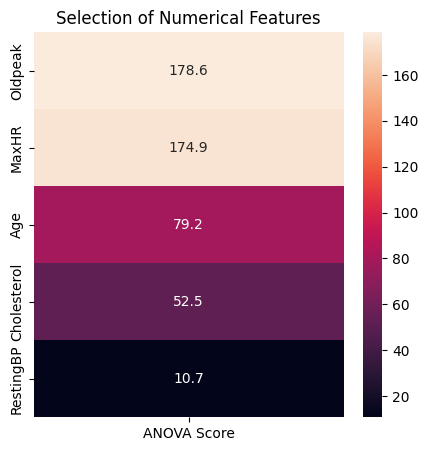

In [42]:
# Anova Test
from sklearn.feature_selection import f_classif

x= df1.loc[:,nf]
y= df1.loc[:,cf[-1]]

best_x= SelectKBest(score_func=f_classif,k='all')
fit= best_x.fit(x,y)
score= pd.DataFrame(data=fit.scores_,index=list(x.columns),columns=['ANOVA Score']) 

plt.subplots(figsize=(5,5))
sns.heatmap(score.sort_values(ascending=False,by='ANOVA Score'),annot=True,fmt='.1f')
plt.title('Selection of Numerical Features')

## <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Modeling</div>

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [51]:
x=df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
y=df1['HeartDisease'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [46]:
import lazypredict

In [52]:
from lazypredict.Supervised import LazyClassifier
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions= clf.fit(x_train,x_test,y_train,y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:01<00:00, 22.21it/s]

[LightGBM] [Info] Number of positive: 413, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562670 -> initscore=0.252006
[LightGBM] [Info] Start training from score 0.252006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████| 29/29 [00:01<00:00, 20.23it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [53]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
LinearDiscriminantAnalysis         0.88               0.88     0.88      0.88  \
RidgeClassifierCV                  0.88               0.88     0.88      0.88   
RidgeClassifier                    0.88               0.88     0.88      0.88   
LinearSVC                          0.87               0.87     0.87      0.87   
CalibratedClassifierCV             0.87               0.87     0.87      0.87   
LogisticRegression                 0.87               0.87     0.87      0.87   
KNeighborsClassifier               0.87               0.87     0.87      0.87   
NearestCentroid                    0.86               0.86     0.86      0.86   
GaussianNB                         0.86               0.86     0.86      0.86   
QuadraticDiscriminantAnalysis      0.86               0.86     0.86      0.86   
AdaBoostClassifier          

In [ ]:
def model(classifier):
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    print("Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test,pred)))
    print("Cross Validation Score: ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv=cv,scoring='roc_auc').mean()))
    print("ROC_AUC Score: ",'{0:.2%}'.format(roc_auc_score(y_test,pred)))
    plot_roc_curve(classifier,x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier):
    cm=confusion_matrix(y_test,classifier.predict(x_test))
    names=['True Neg','False Pos','False Neg','True Pos']
    counts=[value for value in cm.flatten()]
    percent=['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels=[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(names,counts,percent)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot=labels,cmap=colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1- Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(random_state=0,C=10,penalty='l2') 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



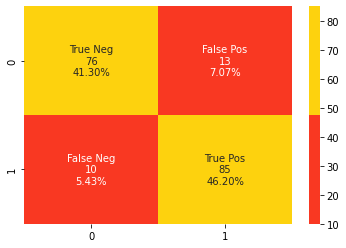

In [39]:
model_evaluation(classifier_lr)

#### 2- Support Vector Classifier:

In [40]:
from sklearn.svm import SVC
classifier_svc= SVC(kernel='linear',C=0.1)

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


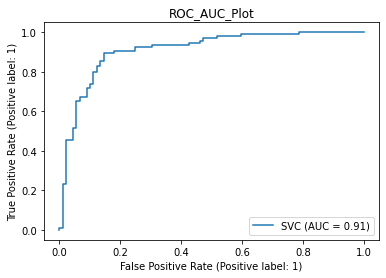

In [42]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



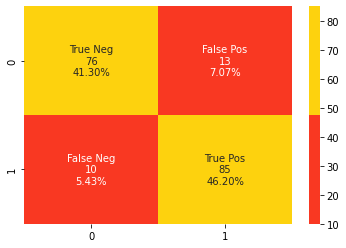

In [43]:
model_evaluation(classifier_svc)

#### 3- Decision Tree Classifier:

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt= DecisionTreeClassifier(random_state=1000,max_depth=4)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  84.62%


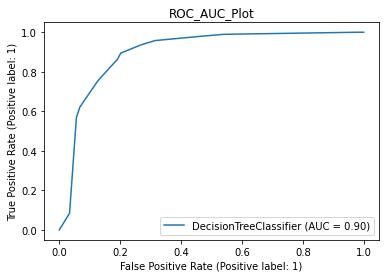

In [46]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



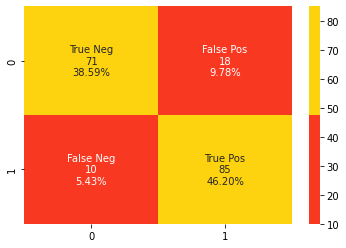

In [47]:
model_evaluation(classifier_dt)

#### 4- Random Forest Classifier:

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(max_depth=4,random_state=0)

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


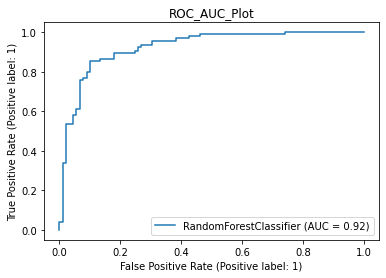

In [50]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



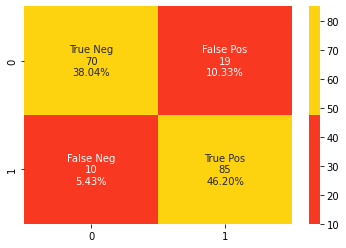

In [51]:
model_evaluation(classifier_rf)

#### 5- K Nearest Neighbour Classifier:

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(leaf_size=1,n_neighbors=3,p=1)

Accuracy :  81.52%
Cross Validation Score :  89.34%
ROC_AUC Score :  81.36%


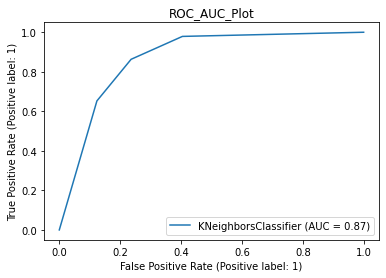

In [54]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



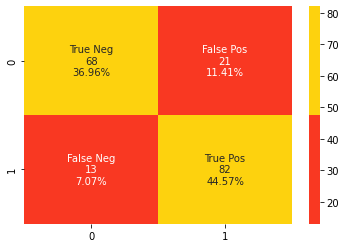

In [55]:
model_evaluation(classifier_knn)

## <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Algorithm Result Table: </div>


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|87.50%|91.12%|87.43%|
|2|Support Vector Classifier|87.50%|90.53%|87.43%|
|3|Decision Tree Classifier|84.78%|89.09%|84.62%|
|4|Random Forest Classifier|84.24%|92.91%|84.06%|
|5|K-Nearest Neighbors Classfier|81.52%|89.34%|81.36%|

## <div style="font-family: Times New Roman; padding: 12px; line-height: 1;">Conclusion: </div>

- This dataset handles binary classification problems with the combination of numerical and categorical features.

- SMEs (doctors or nurses) can be assisted by providing insights that enables them to take the next line of action.

- For feature engineering, data scaling was executed before the feature selection test. We might feel like we are tampering with the data before passing it to the tests but the results are the same irrespective of the order of the process.

- For modeling, hyperparameter tuning is not done. It can push the performances of the algorithms.

In [36]:
# Creating pkl file

import pickle as pk
pk.dump(df,open('heart_disease.pkl','wb'))
load_df= pk.load(open('heart_disease.pkl', 'rb'))